# scope traces - FFPR

In [2]:
import matplotlib.pyplot as plt
from numpy import *
import csv
import os
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

In [10]:
def process_csv(fname, newline='', cols=True, skiprows=1):
    rows = []
    with open(fname, 'r', newline=newline) as f:
        reader = csv.reader(f, delimiter=',')

        while skiprows > 0:
            reader.__next__()
            skiprows -= 1
        
        for row in reader:
            try:
                rows.append([float(x) for x in row if x != ''])
            except ValueError:
                print(f"row is problematic: \n {row}")

    if cols:
        return array(rows).T
    
    return rows

In [24]:
# sample the file contents, get time increment
files = ['ffpr_locked_20210607.csv','ffpr_unlocked_20210607.csv']
fname = files[0]
newline=''
with open(fname, 'r', newline=newline) as f:
    reader = csv.reader(f, delimiter=',')
    for i,row in enumerate(reader):
        if i == 1:
            t_incr = float(row[5])        
        if i < 10:
            print(row)

['CH1', 'CH2', 'CH3', 'CH4', 'Start', 'Increment', '']
['Volt', 'Volt', 'Volt', 'Volt', '-1.33200e-02', '2.00000e-05']
['2.30e+00', '4.00e-04', '8.20e-01', '1.20e-02', '']
['2.30e+00', '4.00e-04', '8.20e-01', '1.20e-02', '']
['2.30e+00', '4.00e-04', '8.18e-01', '1.20e-02', '']
['2.30e+00', '4.00e-04', '8.18e-01', '1.20e-02', '']
['2.30e+00', '8.00e-04', '8.20e-01', '1.20e-02', '']
['2.30e+00', '8.00e-04', '8.20e-01', '1.20e-02', '']
['2.30e+00', '8.00e-04', '8.20e-01', '8.00e-03', '']
['2.30e+00', '8.00e-04', '8.20e-01', '8.00e-03', '']


In [21]:
data = [process_csv(f, skiprows=2) for f in files]
data

[array([[2.30e+00, 2.30e+00, 2.30e+00, ..., 2.30e+00, 2.30e+00, 2.30e+00],
        [4.00e-04, 4.00e-04, 4.00e-04, ..., 4.00e-04, 0.00e+00, 0.00e+00],
        [8.20e-01, 8.20e-01, 8.18e-01, ..., 8.20e-01, 8.20e-01, 8.20e-01],
        [1.20e-02, 1.20e-02, 1.20e-02, ..., 8.00e-03, 1.20e-02, 1.20e-02]]),
 array([[2.60e+00, 2.60e+00, 2.60e+00, ..., 3.18e+00, 3.18e+00, 3.18e+00],
        [0.00e+00, 0.00e+00, 0.00e+00, ..., 4.00e-04, 4.00e-04, 4.00e-04],
        [8.40e-01, 8.40e-01, 8.40e-01, ..., 8.40e-01, 8.38e-01, 8.38e-01],
        [1.20e-02, 1.20e-02, 8.00e-03, ..., 8.00e-03, 8.00e-03, 8.00e-03]])]

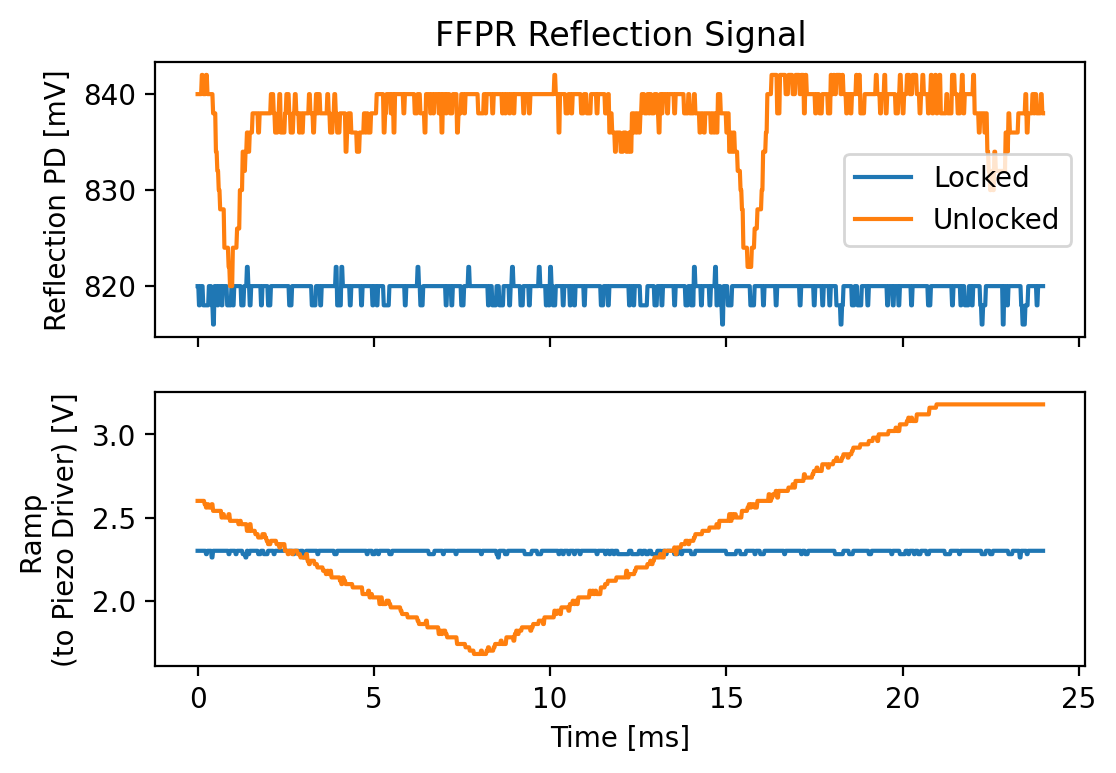

In [51]:
fig,axes = plt.subplots(2,1,sharex=True,dpi=200)
tpts = arange(0,len(data[0][1])*t_incr,t_incr)*1e3

ax,ax1 = axes

# locked data
ax.plot(tpts,data[0][2]*1e3,label='Locked')

# unlocked
ax.plot(tpts,data[1][2]*1e3,label='Unlocked')
ax.set_ylabel('Reflection PD [mV]')
ax.set_title('FFPR Reflection Signal')

ax1.plot(tpts,data[0][0],label='Ramp, locked')
ax1.plot(tpts,data[1][0],label='Ramp, unlocked')
ax1.set_xlabel('Time [ms]')
ax1.set_ylabel("Ramp \n(to Piezo Driver) [V]")

ax.legend(loc='right')
plt.savefig(fname,bbox_inches='tight')
plt.show()
fname = 'ffpr_locked_vs_unlocked_20210607.png'